In [1]:
import numpy as np
import pandas as pd

from nltk import word_tokenize
import nltk
from collections import Counter
stop_words = nltk.corpus.stopwords.words('english')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from urllib import request
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# texts
tromso_description = """Tromsø is a beautiful city between FJORDS, ISLANDS AND MOUNTAINS, with a visible past, a fascinating history, a lively, colourful city centre, an inclusive nightlife and numerous attractions. Use the city as a base to foray into Arctic wilderness chasing Midnight Sun and Northern Lights. 01. 02."""
oslo_description = """Oslo is considered as a global city and is the major Norwegian hub for trading, shipping and banking. Location of Oslo: OSLO IS POSITIONED AT THE NORTHERNMOST END OF THE OSLOFJORD and occupies around 40 big and small islands within its limits. The climate of the region is temperate, humid."""
mining_course_description = """The aim of the course is to introduce the students to the concepts and techniques of natural languages processing and analysis, unstructured information analysis and management for better decision- making by deriving valuable insights from enterprise content regardless of source or format. The course provides deep and rich knowledge of text analysis techniques and applications including sentiment analysis and opinion mining, information access and text mining, document classification, topic extraction and other techniques and applications using real-world data and cases."""

In [3]:
# function to tokenize text
def token_pro(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens] # everything lowercase
    tokens = [word.strip() for word in tokens] # strips whitespaces
    tokens = [word for word in tokens if word.isalnum()] # only alpha numerical values
    tokens = [word for word in tokens if not word in stop_words] # removes stopwords
    return tokens 

# function to generate bag of words
def genBow(tokens):
    bow = Counter(tokens)
    return bow

# function to print bag of words as a vector of term frequencies
def printBow(bow, queryString):
    query_frequency = Counter(queryString)
    tf_vec = []
    for word in bow:
        if word in queryString:
            tf = query_frequency[word] #/len(bow)
        else:
            tf = 0
        tf_vec.append(tf)
    return tf_vec

In [4]:
# tokenize texts
token_tromso = token_pro(tromso_description)
token_oslo = token_pro(oslo_description)
token_nlp =  token_pro(mining_course_description)

# print first 10 tokens
print(token_tromso[:10])
print(token_oslo[:10])
print(token_nlp[:10])


['tromsø', 'beautiful', 'city', 'fjords', 'islands', 'mountains', 'visible', 'past', 'fascinating', 'history']
['oslo', 'considered', 'global', 'city', 'major', 'norwegian', 'hub', 'trading', 'shipping', 'banking']
['aim', 'course', 'introduce', 'students', 'concepts', 'techniques', 'natural', 'languages', 'processing', 'analysis']


In [5]:
# get text from url
url = "https://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(raw[:200])

# tokenize text from url
token_CP = token_pro(raw)
print(token_CP[:10])

The Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with a
['project', 'gutenberg', 'ebook', 'crime', 'punishment', 'fyodor', 'dostoevsky', 'ebook', 'use', 'anyone']


In [6]:
# create corpus of texts
corpus = [tromso_description, oslo_description, mining_course_description, raw]

# tokenize corpus
tokens_corpus = token_pro((' ').join(corpus))
tokens_corpus[:10]

['tromsø',
 'beautiful',
 'city',
 'fjords',
 'islands',
 'mountains',
 'visible',
 'past',
 'fascinating',
 'history']

In [20]:
print('copus lenght: ', len(tokens_corpus))
print('CP lenght: ', len(token_CP))
print('tromso lenght: ', len(token_tromso))
print('oslo lenght: ', len(token_oslo))
print('nlp lenght: ', len(token_nlp))


copus lenght:  91379
CP lenght:  91268
tromso lenght:  31
oslo lenght:  29
nlp lenght:  51


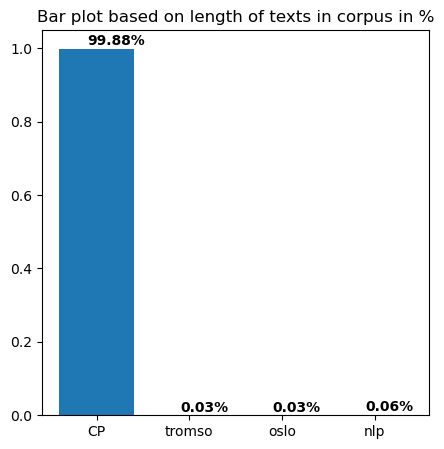

In [35]:
# bar plot based on length of texts in corpus
plt.figure(figsize=(5,5))
plt.bar(['CP', 'tromso', 'oslo', 'nlp'], [len(token_CP)/len(tokens_corpus), len(token_tromso)/len(tokens_corpus), len(token_oslo)/len(tokens_corpus), len(token_nlp)/len(tokens_corpus)])
# add text to bar of how many percent of the corpus the text is
for i, v in enumerate([len(token_CP)/len(tokens_corpus), len(token_tromso)/len(tokens_corpus), len(token_oslo)/len(tokens_corpus), len(token_nlp)/len(tokens_corpus)]):
    plt.text(i-.1, v+.01, str(round(v*100, 2))+'%', color='black', fontweight='bold')

plt.title('Bar plot based on length of texts in corpus in %')
plt.show()

In [8]:
# generate bag of words
bow_corpus = genBow(tokens_corpus)

# print bag of words most common words
bow_corpus.most_common(10)

[('raskolnikov', 782),
 ('one', 638),
 ('would', 572),
 ('know', 524),
 ('said', 518),
 ('could', 496),
 ('come', 476),
 ('man', 474),
 ('like', 452),
 ('though', 443)]

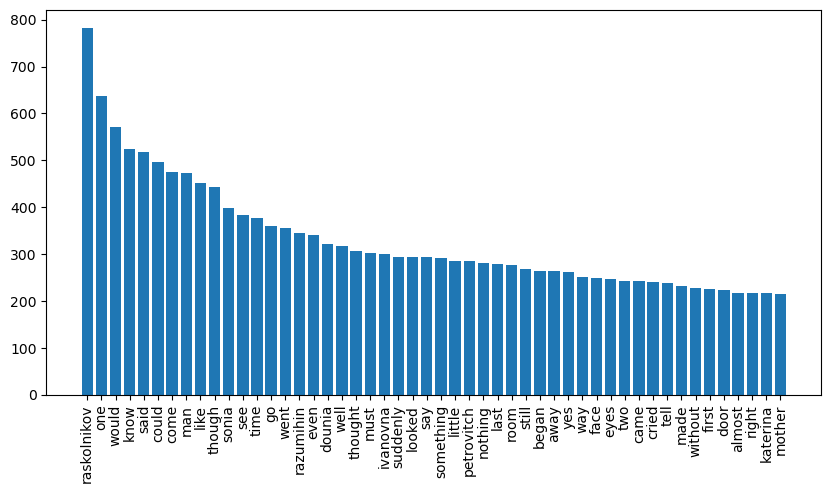

In [9]:
# plot bag of words most common words
plt.figure(figsize=(10,5))
plt.bar(*zip(*bow_corpus.most_common(50)))
plt.xticks(rotation=90)
plt.show()

In [10]:
# using own functions to generate bag of words

# generate bag of words for each text
bow_tromso = genBow(token_tromso)
bow_oslo = genBow(token_oslo)
bow_nlp = genBow(token_nlp)
bow_CP = genBow(token_CP)

# running our sentences through the tf function:
tf_tromso = printBow(bow_corpus, bow_tromso)
tf_oslo = printBow(bow_corpus, bow_oslo)
tf_nlp = printBow(bow_corpus, bow_nlp)
tf_CP = printBow(bow_corpus, bow_CP)

# Converting to dataframe for visualization
ownFunctionsBow = pd.DataFrame([tf_tromso, tf_oslo, tf_nlp, tf_CP], columns=bow_corpus.keys(), index=['tromso', 'oslo', 'nlp', 'CP'])
ownFunctionsBow

,tromsø,beautiful,city,fjords,islands,mountains,visible,past,fascinating,history,...,library,network,volunteer,necessarily,edition,pg,facility,includes,subscribe,newsletter
tromso,1,1,3,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
oslo,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nlp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CP,0,7,3,0,4,0,1,34,5,6,...,1,1,1,1,1,1,1,1,1,1


In [11]:
# Using sklearn to generate bag of words
vectorizer = CountVectorizer(stop_words='english', lowercase=True, token_pattern=r'(?u)\b[A-Za-z]+\b')
X = vectorizer.fit_transform(corpus)
sklearnBow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=['tromso', 'oslo', 'nlp', 'CP'])
sklearnBow

,aback,abandon,abandoned,abandoning,abasement,aberration,abide,abiding,ability,abject,...,yusupov,zaharovitch,zametov,zarnitsyn,zeal,zest,zeus,zigzags,zimmerman,zossimov
tromso,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
oslo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nlp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CP,4,3,10,1,1,2,1,2,2,1,...,3,10,90,2,1,2,1,1,1,87


In [12]:
# similarity matrix using sklearn
similarity_sklearn = pd.DataFrame(cosine_similarity(sklearnBow, dense_output=True), columns=["tromso", "oslo", "nlp", "CP"], index=["tromso", "oslo", "nlp", "CP"])
similarity_sklearn.head()

,tromso,oslo,nlp,CP
tromso,1.000000,0.121268,0.000000,0.008290
oslo,0.121268,1.000000,0.000000,0.008098
nlp,0.000000,0.000000,1.000000,0.026442
CP,0.008290,0.008098,0.026442,1.000000


In [13]:
# similarity matrix using the bow generated by our own functions
similarity_ownFunctions = pd.DataFrame(cosine_similarity(ownFunctionsBow, dense_output=True), columns=["tromso", "oslo", "nlp", "CP"], index=["tromso", "oslo", "nlp", "CP"])
similarity_ownFunctions.head()

,tromso,oslo,nlp,CP
tromso,1.000000,0.111154,0.0000,0.008419
oslo,0.111154,1.000000,0.0000,0.010073
nlp,0.000000,0.000000,1.0000,0.026400
CP,0.008419,0.010073,0.0264,1.000000


### **conclusion**
there is a slight difference between the outcome of the sklearn CountVectorizer method compared to the usage of our own function to create the bow.<br>
The main reason for that is the handling of the tokenization. **Sklearn** provides us with **9312 tokens**, whereas our **token_pro()** function returns us **91379 tokens**.<br>

**LOC**<br>
now lets analyse the loc (lines of code) of both ways to get to the same outcome. => from imports, texts, functions to table with similarties<br>
rough count:<br>
| Method | LOC | total |
| -------- |:--------:|--------:|
| sklearn | 4 import + 12 code | 16 |
| own implementation | 6 import + 20 functions + 24 code | 50 |

<br>
as you can see is the implementation with sklearn much more efficient and faster

In [14]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, token_pattern=r'(?u)\b[A-Za-z]+\b')
X_tfidf = tfidf_vectorizer.fit_transform(corpus)
sklearnTfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=['tromso', 'oslo', 'nlp', 'CP'])
sklearnTfidf

,aback,abandon,abandoned,abandoning,abasement,aberration,abide,abiding,ability,abject,...,yusupov,zaharovitch,zametov,zarnitsyn,zeal,zest,zeus,zigzags,zimmerman,zossimov
tromso,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
oslo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
nlp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CP,0.001125,0.000844,0.002813,0.000281,0.000281,0.000563,0.000281,0.000563,0.000563,0.000281,...,0.000844,0.002813,0.025321,0.000563,0.000281,0.000563,0.000281,0.000281,0.000281,0.024477


In [15]:
# similarity matrix using sklearn
similarity_tfidf = pd.DataFrame(cosine_similarity(sklearnTfidf, dense_output=True), columns=["tromso", "oslo", "nlp", "CP"], index=["tromso", "oslo", "nlp", "CP"])
similarity_tfidf.head()

,tromso,oslo,nlp,CP
tromso,1.000000,0.065881,0.000000,0.006243
oslo,0.065881,1.000000,0.000000,0.005328
nlp,0.000000,0.000000,1.000000,0.018989
CP,0.006243,0.005328,0.018989,1.000000


In [16]:
queryString1 = "Tromsø is a beautiful city between FJORDS, ISLANDS AND MOUNTAINS, with a visible past, a fascinating history"
queryString2 = "Oslo is considered as a global city and is the major Norwegian hub for trading, shipping and banking"
queryString3 = "The aim of the course is to introduce the students to the concepts and techniques of natural languages valuable insights from enterprise content regardless of source or format"

corpus_queries = [tromso_description, oslo_description, mining_course_description, raw, queryString1, queryString2, queryString3]

In [17]:
# Using sklearn to generate bag of words
vec_queries = CountVectorizer(stop_words='english', lowercase=True, token_pattern=r'(?u)\b[A-Za-z]+\b')
X_queries = vec_queries.fit_transform(corpus_queries)
sklearnBowQueries = pd.DataFrame(X_queries.toarray(), columns=vec_queries.get_feature_names_out(), index=['tromso', 'oslo', 'nlp', 'CP', 'query1', 'query2', 'query3'])
sklearnBowQueries

,aback,abandon,abandoned,abandoning,abasement,aberration,abide,abiding,ability,abject,...,yusupov,zaharovitch,zametov,zarnitsyn,zeal,zest,zeus,zigzags,zimmerman,zossimov
tromso,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
oslo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nlp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CP,4,3,10,1,1,2,1,2,2,1,...,3,10,90,2,1,2,1,1,1,87
query1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
query2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
query3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# similarity matrix
similarity_queries = pd.DataFrame(cosine_similarity(sklearnBowQueries, dense_output=True), columns=["tromso", "oslo", "nlp", "CP", "query1", "query2", "query3"], index=["tromso", "oslo", "nlp", "CP", "query1", "query2", "query3"])
similarity_queries

,tromso,oslo,nlp,CP,query1,query2,query3
tromso,1.000000,0.121268,0.000000,0.008290,0.628828,0.162698,0.000000
oslo,0.121268,1.000000,0.000000,0.008098,0.117851,0.670820,0.000000
nlp,0.000000,0.000000,1.000000,0.026442,0.000000,0.000000,0.513239
CP,0.008290,0.008098,0.026442,1.000000,0.005902,0.001511,0.016254
query1,0.628828,0.117851,0.000000,0.005902,1.000000,0.105409,0.000000
query2,0.162698,0.670820,0.000000,0.001511,0.105409,1.000000,0.000000
query3,0.000000,0.000000,0.513239,0.016254,0.000000,0.000000,1.000000
